# Example 3: Cyclone Track

In this last example, we showcases how **RADWave** can be used to query wave conditions from altimeter database along a specified cyclone track.

## Loading RADWave library and initialisation

We first start by importing **RADwave** library into our working space.

In [1]:
import RADWave as rwave

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

First we will use already downloaded dataset of track of cyclone YASI. The data was obtained from the Australian Bureau of Meteorology ([BOM cyclone tracks](http://www.bom.gov.au/cyclone/history/tracks/)).

To load this file in the `waveAnalysis` class, the cyclone track needs to be a `CSV` file with in the header having the following keyword names `lon`, `lat` & `datetime`. 

To only visualise the tracks on a map, a minimal number of options have to be set as shown in the cell below:

In [2]:
cyc = rwave.waveAnalysis(cycloneCSV='../dataset/2010-YASI.csv')

Plotting the tracks is done by using the following function:

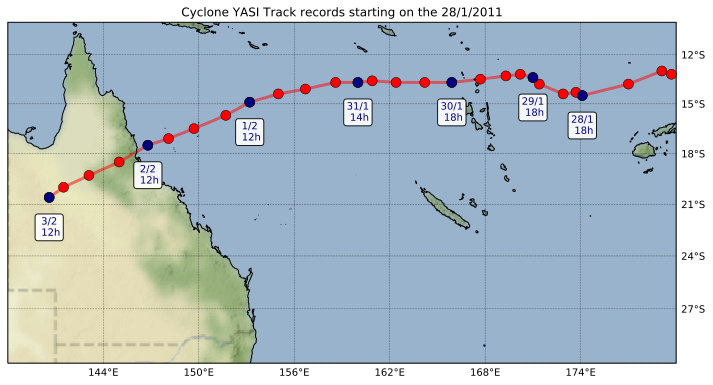

In [3]:
cyc.plotCycloneTracks(title="Cyclone YASI Track", markersize=100, zoom=4, 
                     extent=[138, 180, -30, -10], fsize=(12, 10))

The geographical extent of the cyclone path and the associated time frame can be infered from the figure above. 

This was used to specify the altimeter data record **location** and **temporal extent** when using the Australian Ocean Data Network portal [AODN](https://portal.aodn.org.au/).


> As for the other examples, we recomend to look at **RADWave** [documentation](https://radwave.readthedocs.io/en/latest/usage.html#getting-altimeter-values-from-data-providers) and the embeded video that explain how to select both a spatial bounding box and a temporal extent from the portal and how to export the file containing the `List of URLs`. This `TXT` file contains a list of `NETCDF` files for each available satellites. 


We will now create 2 new **RADWave** classes names (`wa_east` and `wa_west`) that will, in addition to the cyclone track, set the list of altimeter `NETCDF` URLs files to query for the analyse in 2 different regions.

For a detail overview of the options available in this class, you can have a look at the [waveAnalysis API](https://radwave.readthedocs.io/en/latest/RADWave.html#RADWave.altiwave.waveAnalysis).


We also call the `processAltimeterData` function to query the actual dataset and store the altimeter data in each class. The description of this function is available from the [API](https://radwave.readthedocs.io/en/latest/RADWave.html#RADWave.altiwave.waveAnalysis.processAltimeterData).

## For the eastern region

In [4]:
wa_east = rwave.waveAnalysis(altimeterURL='../dataset/IMOS_YASI_east.txt', bbox=[170, 175, -17, -12], 
                  stime=[2011,1,27], etime=[2011,2,4], cycloneCSV='../dataset/2010-YASI.csv')

wa_east.processAltimeterData(altimeter_pick='all', saveCSV = 'altimeterDataE.csv')

Processing Altimeter Dataset 

   +  name JASON-2     / number of tracks 19  
   +  name CRYOSAT-2   / number of tracks 25  
   +  name ENVISAT     / number of tracks 25  
 
Processing altimeter dataset took:  15 s


## For the western region

In [5]:
wa_west = rwave.waveAnalysis(altimeterURL='../dataset/IMOS_YASI_west.txt', bbox=[156, 161, -16, -12], 
                  stime=[2011,1,27], etime=[2011,2,4], cycloneCSV='../dataset/2010-YASI.csv')

wa_west.processAltimeterData(altimeter_pick='all', saveCSV = 'altimeterDataW.csv')

Processing Altimeter Dataset 

   +  name JASON-2     / number of tracks 16  
   +  name CRYOSAT-2   / number of tracks 20  
   +  name ENVISAT     / number of tracks 20  
 
Processing altimeter dataset took:  12 s


In the case where a cyclone track is given when initialising the `waveAnalysis` class, the `visualiseData` plots not only the extent of the altimeter dataset but also the associated path.

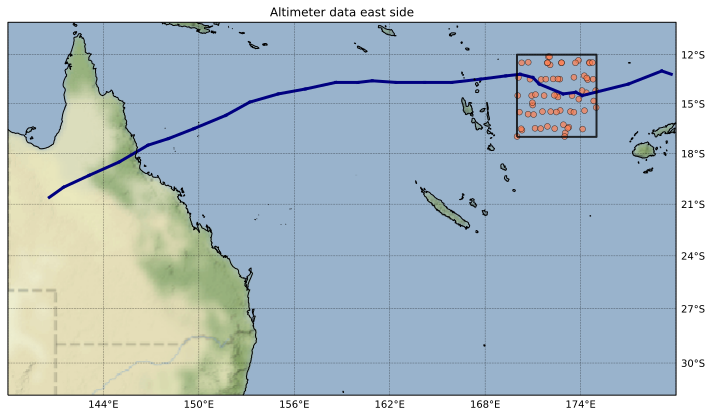

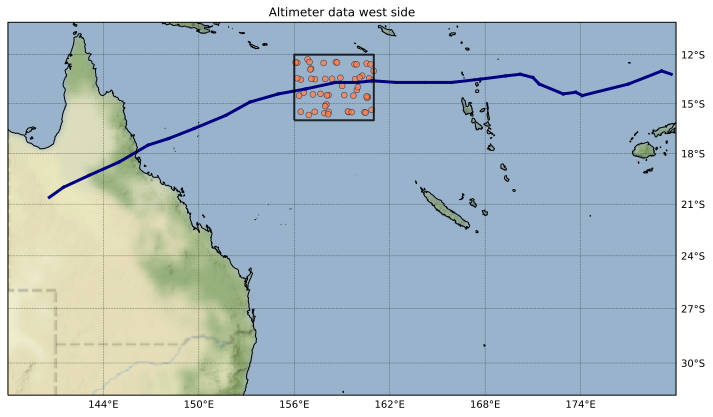

In [6]:
wa_east.visualiseData(title="Altimeter data east side", extent=[138, 180, -30, -10.0], 
                 markersize=35, zoom=4, fsize=(12, 10), fsave=None)

wa_west.visualiseData(title="Altimeter data west side", extent=[138, 180, -30, -10.0], 
                 markersize=35, zoom=4, fsize=(12, 10), fsave=None)

# Extracting relevant wave dataset

Once the data has been loaded, the following step consist in computing the wave [parameters](https://radwave.readthedocs.io/en/latest/method.html#) by running the `generate_time_series` function.

This function computes both **instantaneous** and **monthly** wave variables:

+ significant wave height (m) - wh & wh_rolling
+ wave period (s)  - period & period_rolling
+ wave energy flux (kW/m)  - power & power_rolling
+ wave average energy density (J/m2)  - energy & energy_rolling
+ wave group velocity (m/s)  - speed & speed_rolling

In [7]:
east_ts = wa_east.generate_time_series()

west_ts = wa_west.generate_time_series()

From the cyclone track, we find the closest processed altimeter geographical locations that have been recorded in the database (based on a `KDTree` search). 

> In addition to their coordinates, the altimeter dataset has to be recorded during a user defined time lapse close enough to the cyclone path time at each position.

This is done using the `close2Track` function that takes the following arguments:

+ `radius`, the maximum radius distance in degree between cyclone position and altimeter data coordinates [here set to 2.]
+ `dtmax`, the maximum difference in time between recorded cyclone date and picked altimeter data (hours) [here set to 6]

This function stores a Pandas dataframe in the `waveAnalysis` class called `cyclone_data` that contains the following variables:

+ altimeter significant wave height (m) - wH
+ altimeter wave period (s) - period
+ altimeter wave energy flux (kW/m) - power
+ altimeter wave average energy density (J/m2) - energy
+ altimeter wave group velocity (m/s) - speed
+ distance between altimeter coordinates and cyclone path (km) - dist
+ cyclone date (datetime) - cdate 
+ difference in time between recorded cyclone date and altimeter data for specific position (hours) - hours
+ cyclone latitude position - clat
+ cyclone longitude position - clon
+ altimeter data latitude position - lat
+ altimeter data longitude position - lon

Depending of the available altimeters dataset and the chosen `radius` and `dtmax` parameters, the Pandas dataframe `cyclone_data` will contain different number of values (or can potentially be empty).

In [8]:
east_track = wa_east.close2Track(radius=2.,dtmax=6.)
display(wa_east.cyclone_data)

west_track = wa_west.close2Track(radius=2.,dtmax=6.)
display(wa_west.cyclone_data)

,clat,clon,date,dist,energy,hours,lat,lon,period,power,speed,wH
0,-14.5,174.1,2011-01-28 18:00:00+00:00,113.604,8.506093,-2.284,-13.529891,174.444580,5.449910,27.703620,8.506093,1.610
1,-14.5,174.1,2011-01-28 18:00:00+00:00,33.699,8.991151,-2.280,-14.330362,174.359543,5.760690,29.721561,8.991151,1.622
2,-14.5,174.1,2011-01-28 18:00:00+00:00,102.590,9.229984,-2.275,-15.416570,174.243790,5.913712,40.989371,9.229984,1.880
3,-14.4,172.9,2011-01-29 06:00:00+00:00,213.351,9.216905,-2.008,-14.505723,170.924179,5.905332,27.536482,9.216905,1.542


,clat,clon,date,dist,energy,hours,lat,lon,period,power,speed,wH
0,-13.6,160.9,2011-01-31 12:00:00+00:00,213.219,10.546121,-0.424,-14.474576,159.141006,6.756970,265.003090,10.546121,4.472000
1,-13.6,160.9,2011-01-31 12:00:00+00:00,207.053,9.823916,-0.421,-13.911661,159.012177,6.294248,197.842215,9.823916,4.003500
2,-13.6,160.9,2011-01-31 12:00:00+00:00,112.107,8.262153,4.478,-12.591736,160.796646,5.293616,218.950608,8.262153,4.592500
3,-13.6,160.9,2011-01-31 12:00:00+00:00,26.814,10.513402,4.482,-13.449617,160.705750,6.736006,643.865845,10.513402,6.981501
4,-13.6,160.9,2011-01-31 12:00:00+00:00,121.311,12.610142,4.487,-14.650486,160.578125,8.079401,915.049623,12.610142,7.599501
5,-13.6,160.9,2011-01-31 12:00:00+00:00,218.935,15.021956,4.491,-15.536715,160.483597,9.624666,1127.820759,15.021956,7.730000
6,-13.7,160.0,2011-01-31 14:00:00+00:00,207.058,10.908749,-2.428,-15.467758,159.369446,6.989307,286.010357,10.908749,4.568000
7,-13.7,160.0,2011-01-31 14:00:00+00:00,126.292,10.546121,-2.424,-14.474576,159.141006,6.756970,265.003090,10.546121,4.472000
8,-13.7,160.0,2011-01-31 14:00:00+00:00,109.344,9.823916,-2.421,-13.911661,159.012177,6.294248,197.842215,9.823916,4.003500
9,-13.7,160.0,2011-01-31 14:00:00+00:00,123.287,9.913371,-2.419,-13.414909,158.898865,6.351562,182.333266,9.913371,3.826000


# Visualising the relevant altimeters date

**RADWave** provides a plotting function to visualise the processed wave data called `plotCycloneAltiPoint` that can be used to also provide information about wave parameters for each data point (by turning the `showinfo` flag to True as explained in the [API](https://radwave.readthedocs.io/en/latest/RADWave.html#RADWave.altiwave.waveAnalysis.plotCycloneAltiPoint).

An example of how to call this function is presented below:

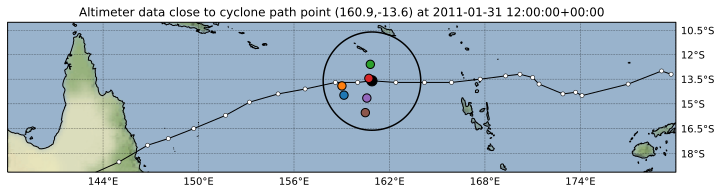

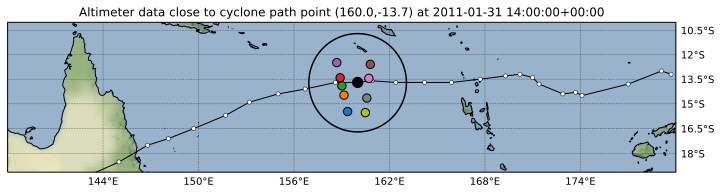

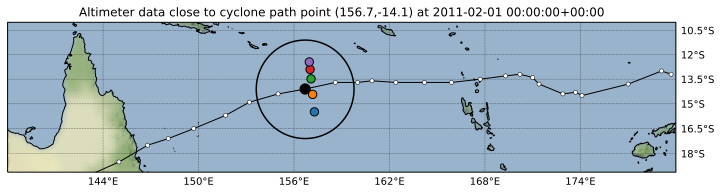

In [10]:
wa_west.plotCycloneAltiPoint(showinfo=False, extent=[138, 180, -18, -10], 
                 markersize=35, zoom=4, fsize=(12, 5))

 
++++++++++++++++++++++++++++++++++++++++++++

Considered cyclone path point (160.9,-13.6) at 2011-01-31 12:00:00+00:00



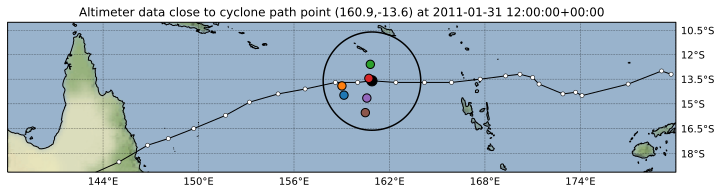

Altimeter point (159.1,-14.5) records dt: -0.42h
    +    Power  265.0 kW/m
    +   Energy  10.55 J/m2
    + Celerity  10.55 m/s
    +   Period  6.76 s
    +   Height  4.47 m
 
Altimeter point (159.0,-13.9) records dt: -0.42h
    +    Power  197.84 kW/m
    +   Energy  9.82 J/m2
    + Celerity  9.82 m/s
    +   Period  6.29 s
    +   Height  4.0 m
 
Altimeter point (160.8,-12.6) records dt: 4.48h
    +    Power  218.95 kW/m
    +   Energy  8.26 J/m2
    + Celerity  8.26 m/s
    +   Period  5.29 s
    +   Height  4.59 m
 
Altimeter point (160.7,-13.4) records dt: 4.48h
    +    Power  643.87 kW/m
    +   Energy  10.51 J/m2
    + Celerity  10.51 m/s
    +   Period  6.74 s
    +   Height  6.98 m
 
Altimeter point (160.6,-14.7) records dt: 4.49h
    +    Power  915.05 kW/m
    +   Energy  12.61 J/m2
    + Celerity  12.61 m/s
    +   Period  8.08 s
    +   Height  7.6 m
 
Altimeter point (160.5,-15.5) records dt: 4.49h
    +    Power  1127.82 kW/m
    +   Energy  15.02 J/m2
    + Celerity  

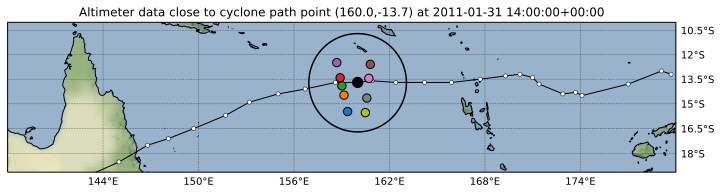

Altimeter point (159.4,-15.5) records dt: -2.43h
    +    Power  286.01 kW/m
    +   Energy  10.91 J/m2
    + Celerity  10.91 m/s
    +   Period  6.99 s
    +   Height  4.57 m
 
Altimeter point (159.1,-14.5) records dt: -2.42h
    +    Power  265.0 kW/m
    +   Energy  10.55 J/m2
    + Celerity  10.55 m/s
    +   Period  6.76 s
    +   Height  4.47 m
 
Altimeter point (159.0,-13.9) records dt: -2.42h
    +    Power  197.84 kW/m
    +   Energy  9.82 J/m2
    + Celerity  9.82 m/s
    +   Period  6.29 s
    +   Height  4.0 m
 
Altimeter point (158.9,-13.4) records dt: -2.42h
    +    Power  182.33 kW/m
    +   Energy  9.91 J/m2
    + Celerity  9.91 m/s
    +   Period  6.35 s
    +   Height  3.83 m
 
Altimeter point (158.7,-12.5) records dt: -2.41h
    +    Power  119.43 kW/m
    +   Energy  9.57 J/m2
    + Celerity  9.57 m/s
    +   Period  6.13 s
    +   Height  3.15 m
 
Altimeter point (160.8,-12.6) records dt: 2.48h
    +    Power  218.95 kW/m
    +   Energy  8.26 J/m2
    + Celerity  

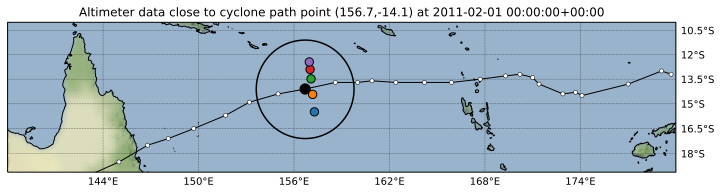

Altimeter point (157.3,-15.5) records dt: 4.75h
    +    Power  1656.45 kW/m
    +   Energy  15.86 J/m2
    + Celerity  15.86 m/s
    +   Period  10.16 s
    +   Height  9.12 m
 
Altimeter point (157.2,-14.4) records dt: 4.76h
    +    Power  864.26 kW/m
    +   Energy  12.23 J/m2
    + Celerity  12.23 m/s
    +   Period  7.84 s
    +   Height  7.5 m
 
Altimeter point (157.1,-13.5) records dt: 4.76h
    +    Power  339.43 kW/m
    +   Energy  10.19 J/m2
    + Celerity  10.19 m/s
    +   Period  6.53 s
    +   Height  5.15 m
 
Altimeter point (157.0,-12.9) records dt: 4.76h
    +    Power  300.77 kW/m
    +   Energy  10.87 J/m2
    + Celerity  10.87 m/s
    +   Period  6.97 s
    +   Height  4.69 m
 
Altimeter point (157.0,-12.4) records dt: 4.77h
    +    Power  296.73 kW/m
    +   Energy  9.84 J/m2
    + Celerity  9.84 m/s
    +   Period  6.31 s
    +   Height  4.9 m
 


In [11]:
wa_west.plotCycloneAltiPoint(showinfo=True, extent=[138, 180, -18, -10], 
                 markersize=35, zoom=4, fsize=(12, 5))

> As already mentioned in the different examples, the class **waveAnalysis()** saves most of the processed wave data as Pandas dataframe (such as `timeseries` or `cyclone_data`) that can be used for further analysis.